# Project Title : Healthcare Claims and Pharmaceutical Analysis Using ICD-11 Codes

In [1]:
import pandas as pd
# Loading data
claims = pd.read_csv('claims_data.csv')
pharma = pd.read_csv('Pharma_data.csv', encoding = 'ISO-8859-1', low_memory = False)
icd11 = pd.read_csv('icd11 codes.csv')

# Show first 5 rows
print(claims.head())
print(pharma.head())
print(icd11.head())

claims_sample = claims.sample(n = 60, random_state = 42)
pharma_sample = pharma.sample(n = 60, random_state = 42)

     Claim ID  Provider ID  Patient ID Date of Service  Billed Amount  \
0  0HO1FSN4AP    126528997  7936697103        8/7/2024            304   
1  9U86CI2P5A   6986719948  1547160031       6/21/2024            348   
2  1QEU1AIDAU   1355108115  2611585318        7/4/2024            235   
3  WH7XDS8CEO   9991055906  7167948632       5/26/2024            112   
4  M6OJEZ8KGI   7382167012  2140226267       7/16/2024            406   

   Procedure Code Diagnosis Code  Allowed Amount  Paid Amount Insurance Type  \
0           99231          A02.1             218          203       Self-Pay   
1           99213          A16.5             216          206       Medicare   
2           99213          A00.1             148          119     Commercial   
3           99215          A18.6              79           69       Medicare   
4           99238          A17.9             320          259       Medicare   

   Claim Status                    Reason Code Follow-up Required  \
0          

In [2]:
# Data Understanding
print(claims_sample.info())
print(pharma_sample.info())
print(icd11.info())

# Checking for null values
print(claims_sample.isnull().sum())
print(pharma_sample.isnull().sum())
print(icd11.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 521 to 820
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Claim ID            60 non-null     object
 1   Provider ID         60 non-null     int64 
 2   Patient ID          60 non-null     int64 
 3   Date of Service     60 non-null     object
 4   Billed Amount       60 non-null     int64 
 5   Procedure Code      60 non-null     int64 
 6   Diagnosis Code      60 non-null     object
 7   Allowed Amount      60 non-null     int64 
 8   Paid Amount         60 non-null     int64 
 9   Insurance Type      60 non-null     object
 10  Claim Status        60 non-null     object
 11  Reason Code         60 non-null     object
 12  Follow-up Required  60 non-null     object
 13  AR Status           60 non-null     object
 14  Outcome             60 non-null     object
dtypes: int64(6), object(9)
memory usage: 7.5+ KB
None
<class 'pandas.core.frame.Da

In [3]:
# Data Cleaning
# Drop rows with missing values
claims_clean = claims_sample.dropna()
pharma_clean = pharma_sample.dropna()
# Removing dupliates and null icd values
icd11.columns = ['icd11', 'description']
icd11_clean = icd11.dropna(subset=['icd11', 'description']).drop_duplicates(subset=['icd11'])

# Converting date to proper format
claims_clean['Date of Service'] = pd.to_datetime(claims_clean['Date of Service'], errors = 'coerce')
#pharma_clean['prescription_date'] = pd.to_datetime(pharma_clean['prescription_date'], errors = 'coerce')

In [4]:
# Data Integration
# Anlalyzing the relationship between 3 datasets
# lets merge claims data and icd11
# Rename for a smoother join
icd11_clean.rename(columns={'icd11': 'Diagnosis Code'}, inplace=True)
# Merge diagnosis descriptions into claims data
claims_merged = claims_clean.merge(icd11_clean, on='Diagnosis Code', how='left')
# Preview important columns
print(claims_merged[['Patient ID', 'Diagnosis Code', 'description', 'Date of Service', 'Paid Amount']].head())


   Patient ID Diagnosis Code description Date of Service  Paid Amount
0   978804224          A08.8         NaN      2024-06-26          174
1   915802079          A18.8         NaN      2024-08-30           93
2  8971633114          A05.7         NaN      2024-09-05          149
3   106059983          A17.8         NaN      2024-06-29          176
4  9299849039          A18.4         NaN      2024-08-02          141


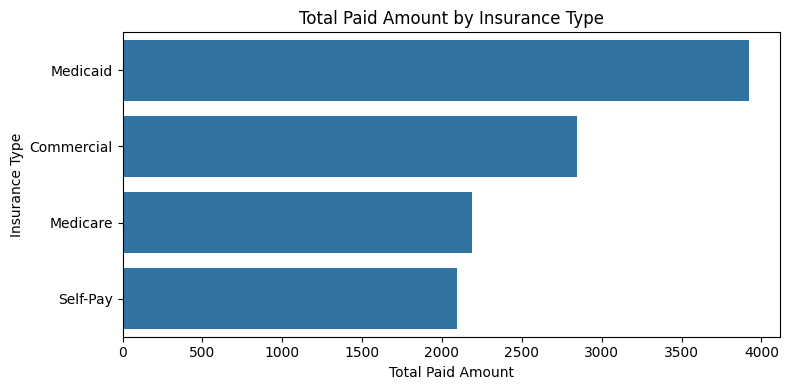

In [11]:
# Exploratory Data Analysis
# 1. Total Paid Amount by Insurance Type
insurance_cost = claims_merged.groupby('Insurance Type')['Paid Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=insurance_cost.values, y=insurance_cost.index)
plt.title('Total Paid Amount by Insurance Type')
plt.xlabel('Total Paid Amount')
plt.ylabel('Insurance Type')
plt.tight_layout()
plt.show()

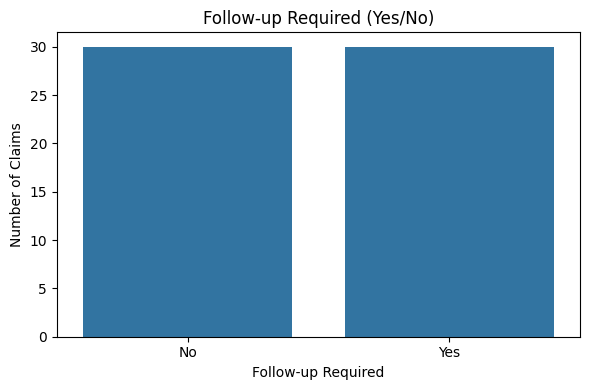

In [12]:
# 2. Follow-up required?
follow_up_count = claims_merged['Follow-up Required'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=follow_up_count.index, y=follow_up_count.values)
plt.title('Follow-up Required (Yes/No)')
plt.xlabel('Follow-up Required')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

In [39]:
# Definign Key KPI's
# The top 5 KPI's are Total Paid Amount, Avg paid amount per claim
# Claim Approval Rate, Follow-up Rate, Insurance Type with Highest Payout

total_paid = claims_clean['Paid Amount'].sum()
avg_paid = claims_clean['Paid Amount'].mean()
approval_rate = (claims_clean['Claim Status'] == 'Paid').mean()*100
followup_rate = (claims_clean['Follow-up Required'] == 'Yes').mean()*100
insurance_payouts = claims_clean.groupby('Insurance Type')['Paid Amount'].sum().sort_values(ascending=False)
top_insurance = insurance_payouts.idxmax()
top_insurance_value = insurance_payouts.max()
print('Total Paid Amount:', total_paid)
print(avg_paid)
print(approval_rate)
print(followup_rate)
print(insurance_payouts)
print(top_insurance)
print(top_insurance_value)

Total Paid Amount: 11051
184.18333333333334
28.333333333333332
50.0
Insurance Type
Medicaid      3920
Commercial    2843
Medicare      2191
Self-Pay      2097
Name: Paid Amount, dtype: int64
Medicaid
3920
